In [25]:
from datetime import datetime, timedelta
from datetime import date

import glob
import os

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import pandas as pd
pd.reset_option('display.max_rows')
print(pd.options.display.max_rows)
pd.reset_option('display.max_columns')
print(pd.options.display.max_columns)
import numpy as np

import stock_research as sr


60
20


In [57]:
EDINET_API_URL = "https://disclosure.edinet-fsa.go.jp/api/v1"
orignal_data_path = '../warehouse/stock/original_data/'

In [66]:
doc_type_code=['120']
SUMMARY_TYPE = 2
start_date = datetime(2022, 2, 1)
end_date = datetime(2022, 2, 28)
for i, date in enumerate(sr.date_range(start_date, end_date)):
    date_str = str(date)[:10]
    df_doc_summary = sr.download_all_documents(date_str, orignal_data_path, EDINET_API_URL,
                                                   SUMMARY_TYPE, doc_type_code)
    if i == 0:
        df_doc_summary_all = df_doc_summary.copy()
    else:
        df_doc_summary_all = pd.concat([df_doc_summary_all, df_doc_summary])
    print(date_str,df_doc_summary_all.shape)


https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-02-01 (5, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-02-02 (20, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-02-03 (30, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-02-04 (51, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-02-05 (51, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-02-06 (51, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-02-07 (65, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-02-08 (90, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-02-09 (121, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-02-10 (204, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-02-11 (204, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
2022-02-12 (204, 27)
https://disclosure.edinet-fsa.go.jp/api/v1/documents.json
202

In [71]:
files = glob.glob(orignal_data_path+'*')
for file in files:
    print(file.split('\\')[1],end=' ')

2022-01-04 2022-01-05 2022-01-06 2022-01-07 2022-01-11 2022-01-12 2022-01-13 2022-01-14 2022-01-17 2022-01-18 2022-01-19 2022-01-20 2022-01-21 2022-01-24 2022-01-25 2022-01-26 2022-01-27 2022-01-28 2022-01-31 2022-02-01 2022-02-02 2022-02-03 2022-02-04 2022-02-07 2022-02-08 2022-02-09 2022-02-10 2022-02-14 2022-02-15 2022-02-16 2022-02-17 2022-02-18 2022-02-21 2022-02-22 2022-02-24 2022-02-25 2022-02-28 2022-03-01 2022-03-02 2022-03-03 2022-03-04 2022-03-07 2022-03-08 2022-03-09 2022-03-10 2022-03-11 2022-03-14 2022-03-15 2022-03-16 2022-03-17 2022-03-18 2022-03-22 2022-03-23 2022-03-24 2022-03-25 2022-03-28 2022-03-29 2022-03-30 2022-03-31 2022-04-01 2022-04-04 2022-04-05 2022-04-06 2022-04-07 2022-04-08 2022-04-11 2022-04-12 2022-04-13 2022-04-14 2022-04-15 2022-04-18 2022-04-19 2022-04-20 2022-04-21 2022-04-22 2022-04-25 2022-04-26 2022-04-27 2022-04-28 stock_code_list 

In [72]:
orignal_data_path

'../warehouse/stock/original_data/'

In [73]:
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 4, 28)
sdate = start_date.strftime('%Y%m%d')
edate = end_date.strftime('%Y%m%d')

i = -1
csv_name = f'submitted_doc_list_{sdate}_{edate}.csv'
save_path = '../warehouse/stock/created/'

In [74]:
for date in sr.date_range(start_date, end_date):
    date_str = str(date)[:10]
    tmppath = orignal_data_path + date_str + '/doc_summary.csv'
    if os.path.exists(tmppath):
        i+=1
        df_doc_summary = pd.read_csv(orignal_data_path + date_str + '/doc_summary.csv')
        if i == 0:
            df_doc_summary_all = df_doc_summary.copy()
        else:
            df_doc_summary_all = pd.concat([df_doc_summary_all, df_doc_summary])
df_doc_summary_all.to_csv(save_path+csv_name,index=False)   
# df_doc_summary_all = pd.read_csv(save_path+csv_name)
# df_doc_summary_all.drop('Unnamed: 0',axis=1).to_csv(save_path+csv_name,index=False)        

In [75]:
save_path = '../warehouse/stock/created/'
stock_code_list_path = '../warehouse/stock/original_data/stock_code_list/data_j(202204_last).csv'
stock_code_list = pd.read_csv(stock_code_list_path)
stock_code_list.rename(columns={'コード': 'secCode'},inplace=True)
df = pd.read_csv(save_path+csv_name)
df = df.dropna(subset=['secCode'])
df.secCode = df.secCode.astype(int)//10
df = pd.merge(df,stock_code_list,how='left')


In [76]:
# df.shape,stock_code_list.shape,pd.merge(df,stock_code_list,how='left').shape
# mask = pd.isna(pd.merge(df,stock_code_list,how='left')['銘柄名']).values
# df[mask]
# stock_code_list.query('secCode==8594')  # 銘柄コードリストはすべての銘柄を網羅しているわけではないらしい…

In [77]:
csv_name = f'submitted_doc_list_only_stock_{sdate}_{edate}.csv'
df.to_csv(save_path+csv_name,index=False)

In [78]:
df = pd.read_csv(save_path+csv_name)
df.head()

,seqNumber,docID,edinetCode,secCode,JCN,filerName,fundCode,ordinanceCode,formCode,docTypeCode,...,Unnamed: 0,日付,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
0,116,S100N5KL,E02762,9941,5.010001e+12,太洋物産株式会社,NaN,10,30000,120,...,NaN,20220428.0,太洋物産,スタンダード（内国株式）,6050.0,卸売業,13.0,商社・卸売,-,-
1,10,S100N7DP,E05015,4707,2.110001e+12,株式会社キタック,NaN,10,30000,120,...,NaN,20220428.0,キタック,スタンダード（内国株式）,9050.0,サービス業,10.0,情報通信・サービスその他,-,-
2,85,S100N8J8,E03336,7640,1.110001e+12,株式会社トップカルチャー,NaN,10,30000,120,...,NaN,20220428.0,トップカルチャー,スタンダード（内国株式）,6100.0,小売業,14.0,小売,7,TOPIX Small 2
3,284,S100N99O,E34814,4441,9.180001e+12,トビラシステムズ株式会社,NaN,10,30000,120,...,NaN,20220428.0,トビラシステムズ,プライム（内国株式）,5250.0,情報・通信業,10.0,情報通信・サービスその他,7,TOPIX Small 2
4,72,S100N9CX,E05376,3733,4.120001e+12,株式会社ソフトウェア・サービス,NaN,10,30000,120,...,NaN,20220428.0,ソフトウェア・サービス,スタンダード（内国株式）,5250.0,情報・通信業,10.0,情報通信・サービスその他,-,-


In [69]:

# 文書IDと提出日を取得
stock_code = 7425
doc_id = df_doc_summary_all.query(f'コード=={stock_code}').docID.values[0]
date = df_doc_summary_all.query(f'コード=={stock_code}').submitDateTime.values[0]
file_path = orignal_data_path + date[:10] + '/' + doc_id + '/XBRL/PublicDoc/*.xbrl'
file_path = glob.glob(file_path)[0]

# データを取得
sr.get_one_xbrl_data(file_path,
              key='jpcrp_cor:NetSalesSummaryOfBusinessResults', 
              context_ref='CurrentYearDuration')

C:\Users\thyt\tfgpu2\.venv\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


'29909632000'

In [70]:
date

'2022-03-30 09:27'

In [73]:
file_path = orignal_data_path + date[:10] + '/' + doc_id + '/XBRL/PublicDoc/*.xbrl'
file_path = glob.glob(file_path)[0]
account_df_path = '../warehouse/stock/created/account_df.csv'
# print(f'seccode:{seccode}')
print(f'doc_id:{doc_id}')
print(f'date:{date}')
print(f'file_path:{file_path}')
print(f'account_df_path:{account_df_path}')
account_df = pd.read_csv(account_df_path)
sr.get_xbrl_data(file_path, account_df)

doc_id:S100NQFZ
date:2022-03-30 09:27
file_path:../warehouse/stock/original_data/2022-03-30/S100NQFZ/XBRL/PublicDoc\jpcrp030000-asr-001_E02797-000_2021-12-31_01_2022-03-30.xbrl
account_df_path:../warehouse/stock/created/account_df.csv


C:\Users\thyt\tfgpu2\.venv\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,name,prior_year,key,context_ref,value
0,net_sales_summary,4.0,jpcrp_cor:NetSalesSummaryOfBusinessResults,Prior4YearDuration,None
1,net_sales_summary,3.0,jpcrp_cor:NetSalesSummaryOfBusinessResults,Prior3YearDuration,None
2,net_sales_summary,2.0,jpcrp_cor:NetSalesSummaryOfBusinessResults,Prior2YearDuration,19449010000
3,net_sales_summary,1.0,jpcrp_cor:NetSalesSummaryOfBusinessResults,Prior1YearDuration,29056373000
4,net_sales_summary,0.0,jpcrp_cor:NetSalesSummaryOfBusinessResults,CurrentYearDuration,29909632000
5,CompanyNameCoverPage,NaN,jpcrp_cor:CompanyNameCoverPage,FilingDateInstant,初穂商事株式会社


4 2019-12-31 00:00:00
2015 12 31
2015-12-31
3 2019-12-31 00:00:00
2016 12 31
2016-12-31
2 2019-12-31 00:00:00
2017 12 31
2017-12-31
1 2019-12-31 00:00:00
2018 12 31
2018-12-31
0 2019-12-31 00:00:00
2019 12 31
2019-12-31


Text(0.5, 1.0, 'Net Sales')

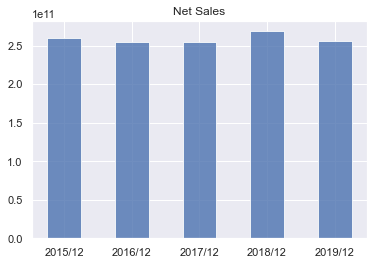

In [142]:
# 売上を取得
net_sales_summary = account_df.query('name=="net_sales_summary"').copy()
# 数値データに変換
net_sales_summary['value'] = net_sales_summary['value'].astype('float')
# x軸用に調整
years = [sr.calc_fiscal_year(prior_year, asof=datetime(2019,12,31))\
         for prior_year in net_sales_summary.prior_year]

net_sales_summary['fiscal_year'] = [str(year.year)+'/'+str(year.month) for year in years]
# 棒グラフを作成
plt.bar(net_sales_summary['fiscal_year'], net_sales_summary['value'], 
        color='b', alpha=0.8, width=0.5)
plt.title('Net Sales')